# GETTING STARTED WITH covid DATASET
## importing the necessary libraries

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [42]:
c_dataset=pd.read_csv("covidanalysis.csv")
c_dataset.head()

c:\Users\DISMAS\Desktop\dwsp\venv\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [43]:
c_dataset["test_indication"].unique()

array(['Other', 'Contact with confirmed', 'Abroad'], dtype=object)

In [44]:
c_dataset.describe

<bound method NDFrame.describe of           test_date  cough  fever  sore_throat  shortness_of_breath  \
0        2020-11-12      0      0            0                    0   
1        2020-11-12      0      1            0                    0   
2        2020-11-12      0      0            0                    0   
3        2020-11-12      0      0            0                    0   
4        2020-11-12      0      1            0                    0   
...             ...    ...    ...          ...                  ...   
2742591  2020-03-11      0      0            0                    0   
2742592  2020-03-11      0      0            0                    0   
2742593  2020-03-11      0      0            0                    0   
2742594  2020-03-11      0      0            0                    0   
2742595  2020-03-11      0      1            0                    0   

         head_ache corona_result age_60_and_above  gender  \
0                0      negative               No   

In [45]:
c_dataset.info

<bound method DataFrame.info of           test_date  cough  fever  sore_throat  shortness_of_breath  \
0        2020-11-12      0      0            0                    0   
1        2020-11-12      0      1            0                    0   
2        2020-11-12      0      0            0                    0   
3        2020-11-12      0      0            0                    0   
4        2020-11-12      0      1            0                    0   
...             ...    ...    ...          ...                  ...   
2742591  2020-03-11      0      0            0                    0   
2742592  2020-03-11      0      0            0                    0   
2742593  2020-03-11      0      0            0                    0   
2742594  2020-03-11      0      0            0                    0   
2742595  2020-03-11      0      1            0                    0   

         head_ache corona_result age_60_and_above  gender  \
0                0      negative               No    m

# DATA CLEANING

In [46]:
c_dataset.isnull().sum()
#we have missing values on gender and ages above 60 which is a missing at random type of data

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [47]:
#Lets get a perspective to this missing data by checking the percentage
c_dataset.isnull().mean()


test_date              0.000000
cough                  0.000000
fever                  0.000000
sore_throat            0.000000
shortness_of_breath    0.000000
head_ache              0.000000
corona_result          0.000000
age_60_and_above       0.199681
gender                 0.033868
test_indication        0.000000
dtype: float64

In [48]:
#before imputing this dataset, I am checking the value count in oder to determine the mode since both the age and gennder columns are non numerical values
c_dataset["age_60_and_above"].value_counts()
# from the results we can see that most petients were below 60 years

No     1908553
Yes     286399
Name: age_60_and_above, dtype: int64

In [49]:
c_dataset["gender"].value_counts()
#and in this case we can see that we had more female patients than male

female    1371444
male      1278266
Name: gender, dtype: int64

In [50]:
# in that case, i will impute the age and gender columns with the mode since i have a clear perspective to it and they are both non numerical.
c_dataset["age_60_and_above"].fillna("No", inplace=True)
c_dataset["gender"].fillna("female", inplace=True)
c_dataset.isnull().sum()

#and now we have delt with missing values

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

In [51]:
#Checking for duplicates
c_dataset.duplicated().sum()
#However the kind of duplicates indicated in this dataset are the yes and no in specific columns, this is udesireble to drop.

2698015

# DATA VISUALIZATION

[Text(0, 0.5, 'number of cases'),
 Text(0.5, 1.0, 'comparison between test indication and test result')]

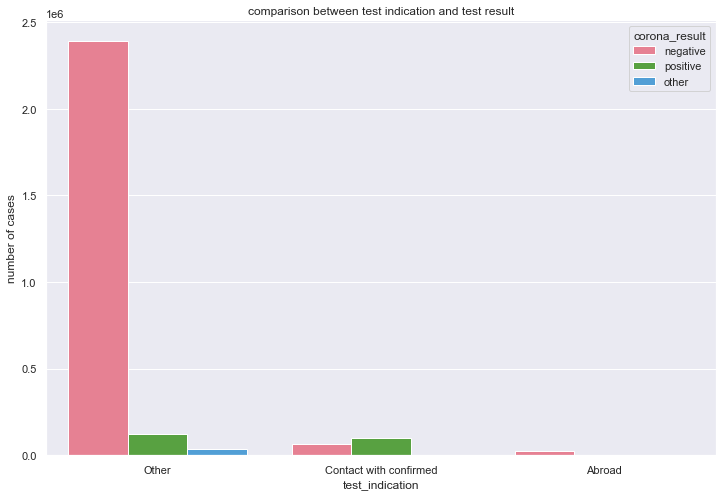

In [52]:
#Checking how this data appears 
#lets see how people in contact with  confirmed vs other and abroad compare with tested result
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x="test_indication",
                                   hue="corona_result",
                                       data=c_dataset,
                                             palette="husl").set(ylabel="number of cases",
                                                title="comparison between test indication and test result")

[Text(0, 0.5, 'number of cases'),
 Text(0.5, 1.0, 'comparison between ages 60 and above and test result')]

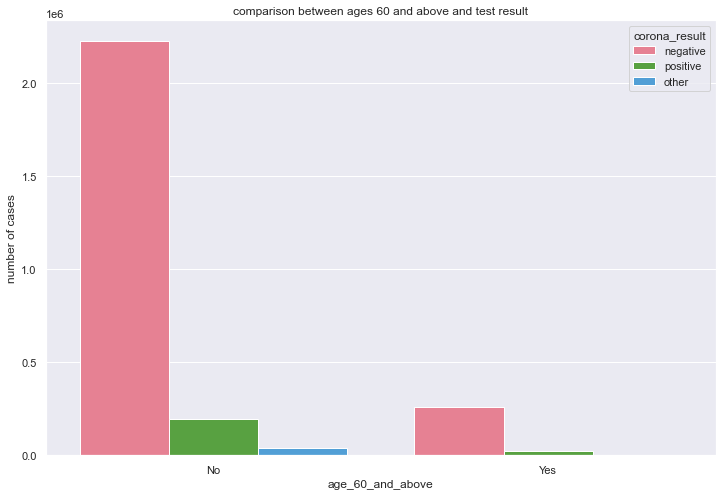

In [53]:
#we can also check how ages above 60 compare with the test result.
#Fuethermore how ages above 60 and were either in contact with confirmed or other or abroad compare with the test results
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x="age_60_and_above", hue="corona_result", data=c_dataset, palette="husl").set(ylabel="number of cases",title="comparison between ages 60 and above and test result")

# FEATURE ENGINEERING

# DATA EXPLORATION


In [54]:
#creating a copy of covid data
c_classification=c_dataset.copy()

#ideally our problem is a classification problem since we are trying to predict weather someone has covid or not based on the symptoms

# For modelling purposes we have to change categorical data to numerical
# The following procedure involves converting the categorical data to numerical

In [55]:
c_classification["test_indication"].dtype

dtype('O')

In [56]:
cat_columns=[column for column in c_classification.columns if c_classification[column].dtype == "O"]

In [57]:
cat_columns

['test_date', 'corona_result', 'age_60_and_above', 'gender', 'test_indication']

In [58]:
# in this case we are going to use label enchode to change the categorical data to numerical
# importing  the label enchoder
import sklearn
from sklearn.preprocessing import LabelEncoder

In [59]:
#Labele enchoding the data
#instantiating the data
enchoder=LabelEncoder()
#Fittting and transforming tha data
for column in cat_columns:
    c_classification[column]=enchoder.fit_transform (c_classification[column])

In [60]:
c_classification.head()
#Now we have successfully converted our data to numerical format

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,246,0,0,0,0,0,0,0,1,2
1,246,0,1,0,0,0,0,0,1,2
2,246,0,0,0,0,0,0,1,0,2
3,246,0,0,0,0,0,0,0,1,2
4,246,0,1,0,0,0,0,0,1,1


In [61]:
#visualisation to check for key features and drop the unnecessary columns


# Feature Engineering

In [62]:
#am checkiing for correlations using the heatmap
corr_matrix=c_classification.corr()


<AxesSubplot:>

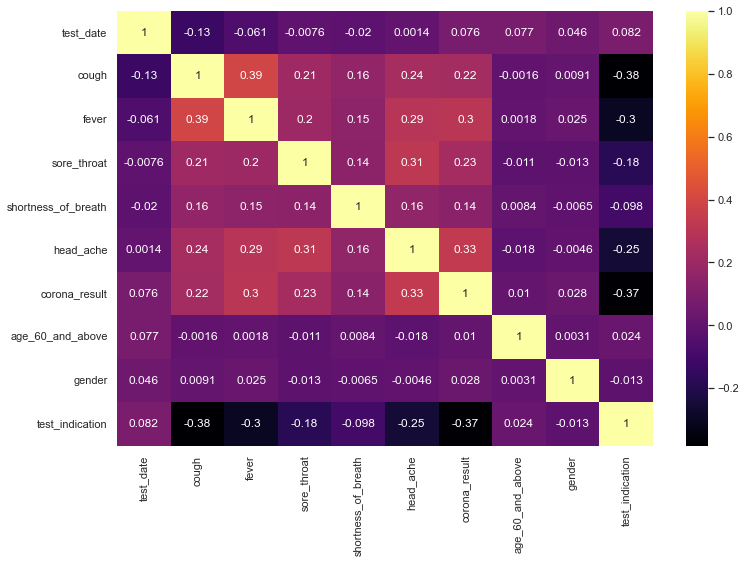

In [63]:
plt.Figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="inferno")

In [64]:
#From the heatmap  we can clearly say that genger and cough have a high correlation and there i can drop one of them to reduce redundancy
#I will drop gender column and test date 
c_classification.drop(["gender","test_date"], axis=1, inplace=True)

In [65]:
c_classification.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,test_indication
0,0,0,0,0,0,0,0,2
1,0,1,0,0,0,0,0,2
2,0,0,0,0,0,0,1,2
3,0,0,0,0,0,0,0,2
4,0,1,0,0,0,0,0,1


In [67]:
c_classification["cough"].unique()

array([0, 1], dtype=int64)

# Modelling

In [70]:
## Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier,AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from sklearn.naive_bayes import GaussianNB

# Import metrics

## Classification metrics
from sklearn.metrics import classification_report

## Regression metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 

In [71]:
# since am working on a supervised model, I am going to separate the dataset into 2
# the target variable and the features
x=c_classification.drop("corona_result", axis=1)
y=c_classification["corona_result"]

In [72]:
#splitting my dataset into training and 0.3 for testintg
from sklearn.model_selection import train_test_split
#split the data
x_train, x_hold, y_train, y_hold = train_test_split(x, y, train_size=0.7, random_state=42)

x_val, x_test, y_val, y_test = train_test_split(x_hold, y_hold, test_size=0.5, random_state=42)

In [74]:
def model_trainer(models, x_train, x_val, y_train, y_val):
    '''
  Trains the model
  '''
  
    for model in models:
        model.fit(x_train, y_train)
        predictions = model.predict(x_val)
        print(model)
        print(classification_report(y_val, predictions))
        print('-'*50)
    

In [76]:
# Define models
# sv = SVC()
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
adaboost = AdaBoostClassifier()
gb = GradientBoostingClassifier()


class_models = [lr, dt, rf, adaboost, gb]

In [78]:
# Train and evaluate
-model_trainer(class_models, x_train, x_val, y_train, y_val)

LogisticRegression()


C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.92      0.98      0.95    372391
           1       0.00      0.00      0.00      6128
           2       0.54      0.27      0.36     32870

    accuracy                           0.91    411389
   macro avg       0.49      0.42      0.44    411389
weighted avg       0.88      0.91      0.89    411389

--------------------------------------------------
DecisionTreeClassifier()


C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    372391
           1       0.00      0.00      0.00      6128
           2       0.60      0.58      0.59     32870

    accuracy                           0.92    411389
   macro avg       0.52      0.51      0.52    411389
weighted avg       0.91      0.92      0.91    411389

--------------------------------------------------
RandomForestClassifier()


C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.95      0.97      0.96    372391
           1       0.00      0.00      0.00      6128
           2       0.60      0.58      0.59     32870

    accuracy                           0.92    411389
   macro avg       0.52      0.52      0.52    411389
weighted avg       0.91      0.92      0.91    411389

--------------------------------------------------


C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


AdaBoostClassifier()


C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

           0       0.92      0.99      0.95    372391
           1       0.00      0.00      0.00      6128
           2       0.64      0.25      0.36     32870

    accuracy                           0.91    411389
   macro avg       0.52      0.41      0.44    411389
weighted avg       0.89      0.91      0.89    411389

--------------------------------------------------
GradientBoostingClassifier()


C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.95      0.97      0.96    372391
           1       0.00      0.00      0.00      6128
           2       0.60      0.57      0.58     32870

    accuracy                           0.92    411389
   macro avg       0.52      0.51      0.51    411389
weighted avg       0.91      0.92      0.91    411389

--------------------------------------------------


C:\Users\DISMAS\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [79]:
# saving the models
import joblib
joblib.dump(lr,"lr.pkl")
joblib.dump(dt,"dt.pkl")
joblib.dump(rf, "rf.pkl")
joblib.dump(adaboost, "adaboost.pkl")
joblib.dump(gb, "gb.pkl")

['gb.pkl']

In [80]:
#  from the m"test_indication"odels I have ignored the error message since 1 represent the value other on corona_results which from the dataset is more like it was not present .that is why we have 0 on the metrics.
c_dataset["corona_result"].unique()


array(['negative', 'positive', 'other'], dtype=object)

In [81]:
c_classification["corona_result"].unique()

array([0, 2, 1])

In [34]:
# The best model in this case is the gradientboostingclassifier
#randomforest seems to have ahuge size
x.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'age_60_and_above', 'test_indication'],
      dtype='object')